In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="{}".format(2) # gpu idx

## Deepfake Detection Challenge
* filename
* label : REAL or FAKE
* original : 영상이 REAL인 경우 None, FAKE인 경우 원본 영상의 이름이 표시됨
* split : "train"

In [2]:
import json
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [3]:
TRAIN_SAMPLE_FOLDER = 'train_sample_videos/'
TEST_FOLDER = 'test_videos/'
train_v = glob.glob(TRAIN_SAMPLE_FOLDER+'*.mp4')
test_v = glob.glob(TEST_FOLDER+'*.mp4')

In [4]:
#Number of train and test videos
print("Train samples : {}".format(len(train_v)))
print("Test samples : {}".format(len(test_v)))

Train samples : 400
Test samples : 400


In [5]:
#load the 'metadata.json'
with open(os.path.join(TRAIN_SAMPLE_FOLDER, 'metadata.json')) as f:
    jdata = json.load(f)

In [6]:
jdata

{'aagfhgtpmv.mp4': {'label': 'FAKE',
  'split': 'train',
  'original': 'vudstovrck.mp4'},
 'aapnvogymq.mp4': {'label': 'FAKE',
  'split': 'train',
  'original': 'jdubbvfswz.mp4'},
 'abarnvbtwb.mp4': {'label': 'REAL', 'split': 'train', 'original': None},
 'abofeumbvv.mp4': {'label': 'FAKE',
  'split': 'train',
  'original': 'atvmxvwyns.mp4'},
 'abqwwspghj.mp4': {'label': 'FAKE',
  'split': 'train',
  'original': 'qzimuostzz.mp4'},
 'acifjvzvpm.mp4': {'label': 'FAKE',
  'split': 'train',
  'original': 'kbvibjhfzo.mp4'},
 'acqfdwsrhi.mp4': {'label': 'FAKE',
  'split': 'train',
  'original': 'ccfoszqabv.mp4'},
 'acxnxvbsxk.mp4': {'label': 'FAKE',
  'split': 'train',
  'original': 'fjlyaizcwc.mp4'},
 'acxwigylke.mp4': {'label': 'FAKE',
  'split': 'train',
  'original': 'ffcwhpnpuw.mp4'},
 'aczrgyricp.mp4': {'label': 'FAKE',
  'split': 'train',
  'original': 'slwkmefgde.mp4'},
 'adhsbajydo.mp4': {'label': 'FAKE',
  'split': 'train',
  'original': 'fysyrqfguw.mp4'},
 'adohikbdaz.mp4': {'label

In [7]:
#convert from json to dataframe
df = pd.read_json(os.path.join(TRAIN_SAMPLE_FOLDER, 'metadata.json'))
df = df.T
df.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, aagfhgtpmv.mp4 to eukvucdetx.mp4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     400 non-null    object
 1   split     400 non-null    object
 2   original  323 non-null    object
dtypes: object(3)
memory usage: 32.5+ KB


In [9]:
#누락된 값이 있는지 확인
total_miss = df.isnull().sum()
percent = (total_miss/df.isnull().count()*100)
tt = pd.concat([total_miss, percent], axis=1, keys = ['Total_miss', 'percent'])
types = []
for col in df.columns:
    dtype = str(df[col].dtype)
    types.append(dtype)
tt['Types'] = types
np.transpose(tt)

,label,split,original
Total_miss,0,0,77
percent,0,0,19.25
Types,object,object,object


In [10]:
#각 column에 포함되어있는 값의 개수 확인
total = df.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
uniques=[]
for col in df.columns:
    unique = df[col].nunique()
    uniques.append(unique)
tt['Uniques']=uniques
np.transpose(tt)

,label,split,original
Total,400,400,323
Uniques,2,1,209


Label : ['FAKE' 'REAL']
FAKE    323
REAL     77
Name: label, dtype: int64


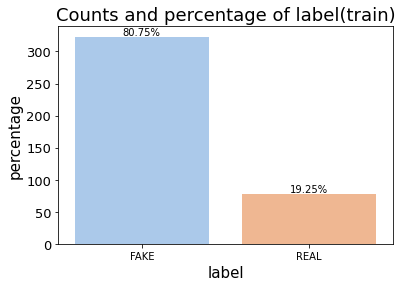

In [11]:
#가짜 비디오와 진짜 비디오의 비율 확인
print("Label : {}".format(df['label'].unique()))
print(df['label'].value_counts())
u=df['label'].unique()
lb=df['label'].value_counts()
index = np.arange(len(lb))
f, ax = plt.subplots(1, 1)
sns.barplot(u, lb, palette='pastel')
plt.title('Counts and percentage of label(train)', fontsize=18)
plt.xlabel('label', fontsize=15)
plt.ylabel('percentage', fontsize=15)
plt.yticks(fontsize=13)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{}%'.format(100*height/400),
            ha="center") 
plt.show()

In [12]:
file_names = os.listdir(TRAIN_SAMPLE_FOLDER)
cap = cv2.VideoCapture(TRAIN_SAMPLE_FOLDER+"/"+file_names[0])
ret, frame = cap.read()
frame.shape

(1080, 1920, 3)

In [13]:
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

print("총 프레임 개수: ",length)
print("동영상 너비 : ", width)
print("동영상 높이 : ", height)
print("프레임 속도 :", fps)

총 프레임 개수:  300
동영상 너비 :  1920
동영상 높이 :  1080
프레임 속도 : 29.97


## Fake video

In [14]:
fake_video = list(df.loc[df.label=='FAKE'].sample(3).index)
fake_video

['errocgcham.mp4', 'avssvvsdhz.mp4', 'crzfebnfgb.mp4']

In [15]:
#영상에서 3개의 이미지만 추출하여 출력
def display_fake(video_path):
    count=0
    rows=1
    cols=3
    fig = plt.figure(figsize=(24, 10))
    cp = cv2.VideoCapture(TRAIN_SAMPLE_FOLDER+"/"+video_path)
    cp.set(cv2.CAP_PROP_POS_FRAMES, 0)#동영상의 현재 프레임 위치를 맨 앞으로 돌려줌
    while(cp.isOpened()):
        ret, image = cp.read()
        #총 300프레임 
        if(int(cp.get(1)) % 100 == 0):#동영상의 처음부터 끝까지 중 3프레임만 추출
            #print('Saved frame number : ' + str(int(cp.get(1))))
            cv2.imwrite("../frame%d.jpg" % count, image)
            #print('Saved frame%d.jpg' % count)
            img = cv2.imread("../frame%d.jpg"%count, cv2.IMREAD_COLOR)
            ax = fig.add_subplot(rows, cols, count+1)
            fig.suptitle('{}--Origin({})'.format(video_path, jdata[video_path]['original']), fontsize=30, y=0.7)#영상 label출력
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            count += 1
        if count == 3:#설정안하면 무한반복(출력될 프레임의 개수에 맞게 설정해야함)
            break

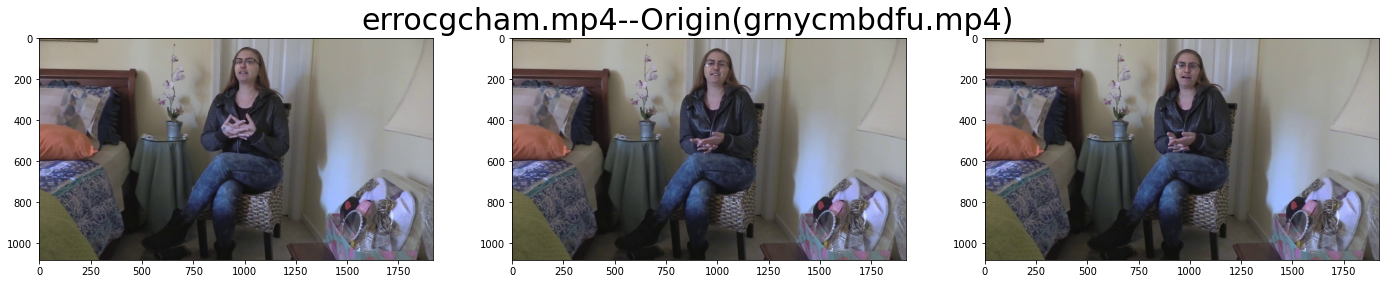

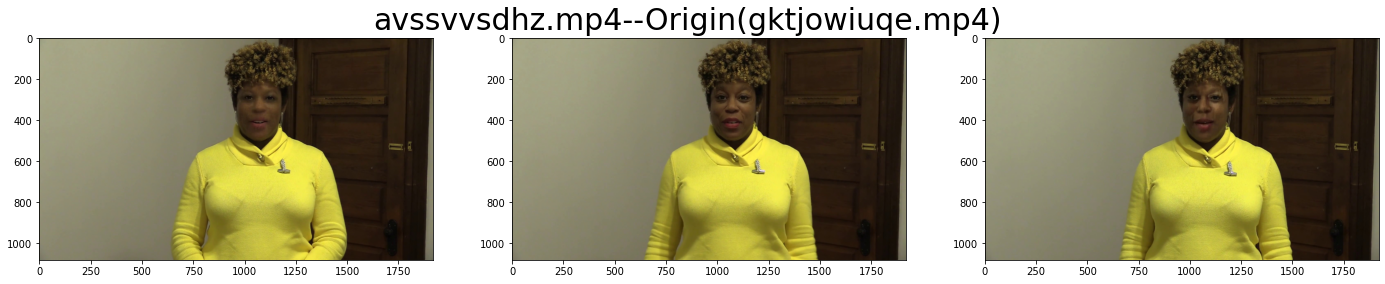

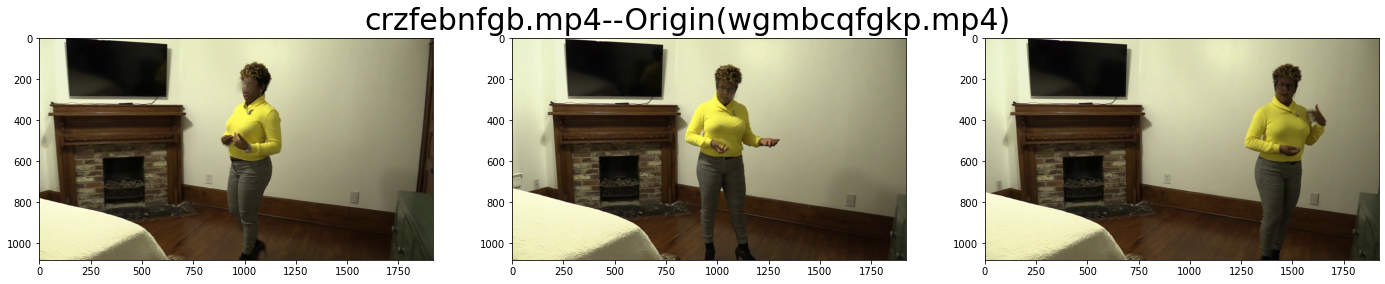

In [16]:
for i in fake_video:
    display_fake(i)

## Original(real) video and fake videos

In [17]:
#원본 영상의 이름과 가짜 영상의 개수
of = df['original'].value_counts()[15:25]
print(of)
same_video = list(df.loc[df.original=='ellavthztb.mp4'].index)
same_video

xzvrgckqkz.mp4    3
ybjrqnqnno.mp4    3
ztbinwxgyu.mp4    3
fgfyrfyqay.mp4    3
jomvcqqars.mp4    3
xwcggrygwl.mp4    3
qzimuostzz.mp4    3
lyvlnqduqg.mp4    3
mmhqllmlew.mp4    3
zrkinjhsuq.mp4    2
Name: original, dtype: int64


['bnjcdrfuov.mp4', 'dbzpcjntve.mp4']

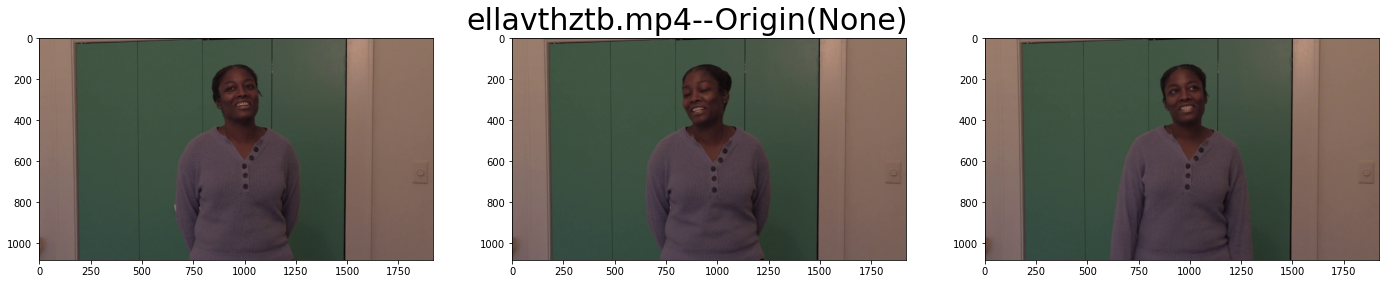

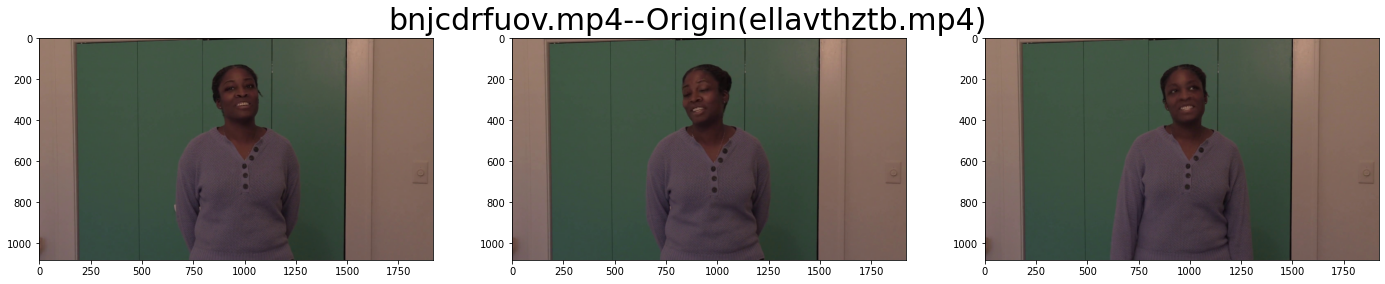

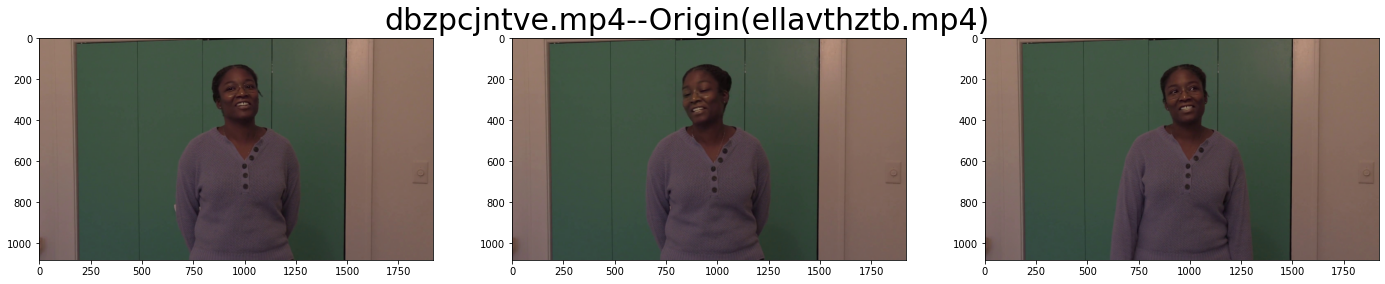

In [18]:
display_fake('ellavthztb.mp4')
for v in same_video:
    display_fake(v)

## 영상 재생

In [ ]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
while(cap.isOpened()):
    #현재 프레임 개수와 총 프레임 개수 비교
    #같은 경우 마지막 프레임이므로 다시 동영상 파일 불러오기
    if(cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT)):
         cap.open(file+video_name)
    ret,frame = cap.read()
    #영상 제목으로 label출력
    cv2.imshow('f', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

In [ ]:
cap.release()